# <center>Customer Segmentation <center>


Grouping customers into sections based on their common characteristics is 
called Customer Segmentation. These clusters allow the companies to target 
the customers with the correct marketing message and tailor their offers for a 
specific group. This not only helps them boost their sales, but also helps them 
build customer relations and understand them in a better way.
In this project, our aim will be to perform customer segmentation on Online 
Retail Dataset (https://archive.ics.uci.edu/ml/datasets/Online+Retail#) to 
understand the customers. Given this dataset, our task is to:
a) Load the dataset and perform a descriptive analysis on it (Total number 
of entries, the column types, unique/non-null entries for each attribute, 
unique stock items, visualizing various attributes using bar charts/piecharts and so on).
b) Perform data cleaning. Specifically, given the dataset, handle the entries 
that either have missing information or have attribute values that are not 
feasible such as negative quantity.
c) Perform data pre-processing for the required attribute fields.
d) Since this database has no additional attribute information for the 
customer, we will use RFM model (refer: https://clevertap.com/blog/rfmanalysis/) for segmentation. Modify the database to include RFM model
attributes.
e) Now once you have your database ready, perform data clustering on 
this dataset by assuming a fixed number of clusters.
f) Find the optimal number of clusters that the customers can be divided into

### Procedure
a) Load and Perform Descriptive Analysis:

Load the dataset from the provided URL using appropriate data loading libraries such as Pandas in Python.
Check the total number of entries (rows) and the number of attributes (columns).
Examine the data types of each attribute (column).
Check for missing information (null values) in each attribute.
Examine unique values or non-null entries for each attribute.
Visualize various attributes using bar charts, pie charts, histograms, or other suitable plots to gain insights into the data.
b) Data Cleaning:

Handle entries with missing information (null values) by either removing rows with missing values or imputing them.
Handle entries with attribute values that are not feasible, such as negative quantity or price. You can choose to remove or correct such entries.
c) Data Pre-processing:

Pre-process the required attribute fields. This may include standardizing, normalizing, or encoding categorical variables if necessary.
d) RFM Model Attribute Creation:

Implement the RFM (Recency, Frequency, Monetary) model for customer segmentation.
Create three new attributes: Recency, Frequency, and Monetary Value for each customer based on their purchase history.
Recency: How recently a customer made a purchase.
Frequency: How often a customer makes purchases.
Monetary Value: How much money a customer has spent.
e) Data Clustering:

Use a clustering algorithm, such as K-Means or hierarchical clustering, to perform customer segmentation based on the RFM attributes.
You can choose a fixed number of clusters as a starting point.
f) Finding Optimal Number of Clusters:

To find the optimal number of clusters, you can employ techniques like the Elbow Method or Silhouette Score.
The Elbow Method involves plotting the sum of squared distances (inertia) for different numbers of clusters and selecting the "elbow point" where the inertia starts to level off.
Silhouette Score measures how similar an object is to its own cluster compared to other clusters. Higher Silhouette Scores indicate better-defined clusters.
In summary, this project involves loading, cleaning, and pre-processing the dataset, creating RFM attributes, performing data clustering, and finding the optimal number of clusters for customer segmentation. Be sure to document your findings and share insights from the analysis, as this will help companies better target and understand their customers.


### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Load and Perform Descriptive Analysis

In [3]:
url="/kaggle/input/online-reatail/Online Retail.xlsx"
df=pd.read_excel(url)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
print("Total number of entries",len(df))
print("Column Types",df.dtypes)
print("Missing values per column",df.isnull().sum())
print("Unique stock items:",df['StockCode'].nunique())

Total number of entries 541909
Column Types InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
Missing values per column InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Unique stock items: 4070


In [13]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


### Visualization

<Axes: xlabel='Country'>

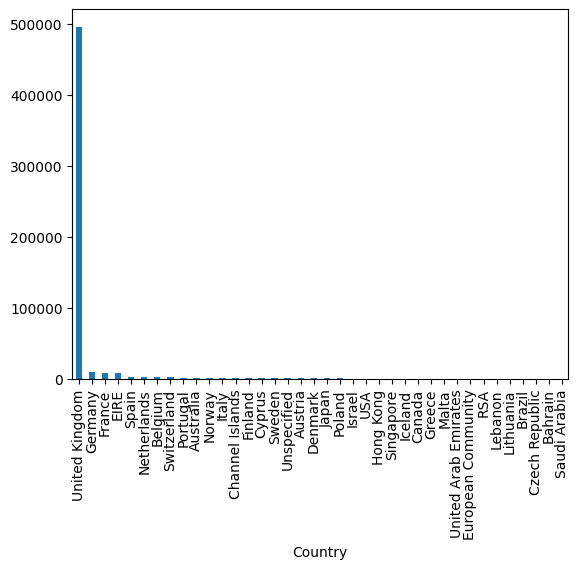

In [12]:
df['Country'].value_counts().plot(kind='bar')

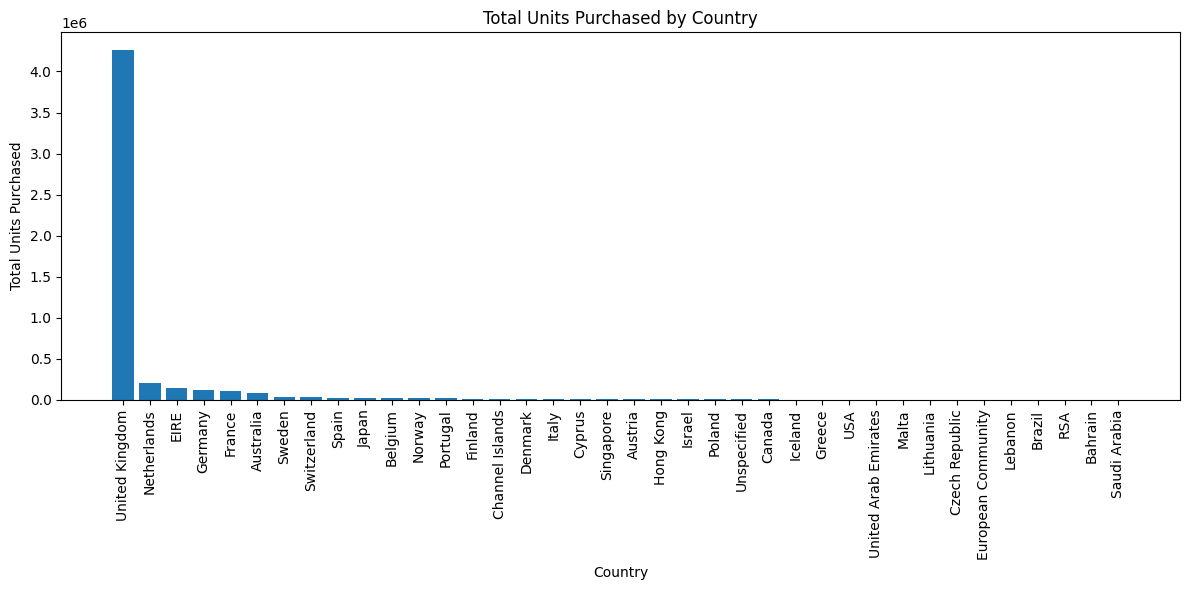

In [9]:
# Group by 'Country' and sum the 'Quantity' for each country
country_units=df.groupby('Country')['Quantity'].sum().reset_index()

# Sort the data by the quantity in descending order for better visualization
country_units=country_units.sort_values(by='Quantity',ascending=False)

# Create a Bar Chart
plt.figure(figsize=(12,6))
plt.bar(country_units['Country'],country_units['Quantity'])
plt.xlabel('Country')
plt.ylabel('Total Units Purchased')
plt.title('Total Units Purchased by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

### Data Cleaning and Preprocessing

In [16]:
# Remove rows with missing CustomerID and negative quantity values
df=df.dropna(subset=['CustomerID'])
df=df[df['Quantity']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### RFM Model Attribute Creation

In [19]:
# Calculate Recency, Frequency, and Monetary Value
today_date = pd.to_datetime(df['InvoiceDate'].max())
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                       'InvoiceNo': 'count'
                                       })
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency'
                       }, inplace=True)


In [30]:

# Calculate MonetaryValue based on Quantity and UnitPrice
df['MonetaryValue'] = df['Quantity'] * df['UnitPrice']

# d) RFM Model Attribute Creation
# Calculate Recency, Frequency, and Monetary Value
today_date = pd.to_datetime(df['InvoiceDate'].max())
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                       'InvoiceNo': 'count',
                                       'MonetaryValue': 'sum'})
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'MonetaryValue': 'MonetaryValue'}, inplace=True)



In [42]:

# Define the RFM segment function
def assign_rfm_segments(recency, frequency, monetary_value):
    if recency <= 30 and frequency >= 3 and monetary_value >= 1000:
        return 'High-Value Customer'
    elif (recency <= 90 and recency > 30) or (frequency >= 2 and frequency < 3) or (monetary_value >= 500 and monetary_value < 1000):
        return 'Mid-Value Customer'
    else:
        return 'Low-Value Customer'

# Apply RFM segments
rfm_df['RFM_Segment'] = rfm_df.apply(lambda x: assign_rfm_segments(x['Recency'], x['Frequency'], x['MonetaryValue']), axis=1)

# Print the RFM analysis table
rfm_df.head()


,Recency,Frequency,MonetaryValue,RFM_Segment,Cluster
CustomerID,,,,,
12346.0,2.334858,-0.396512,8.359634,Low-Value Customer,0
12347.0,-0.905199,0.394688,0.251046,Low-Value Customer,1
12348.0,-0.175186,-0.265374,-0.028546,Low-Value Customer,1
12349.0,-0.735196,-0.081781,-0.032963,Low-Value Customer,1
12350.0,2.174855,-0.326572,-0.191315,Low-Value Customer,0


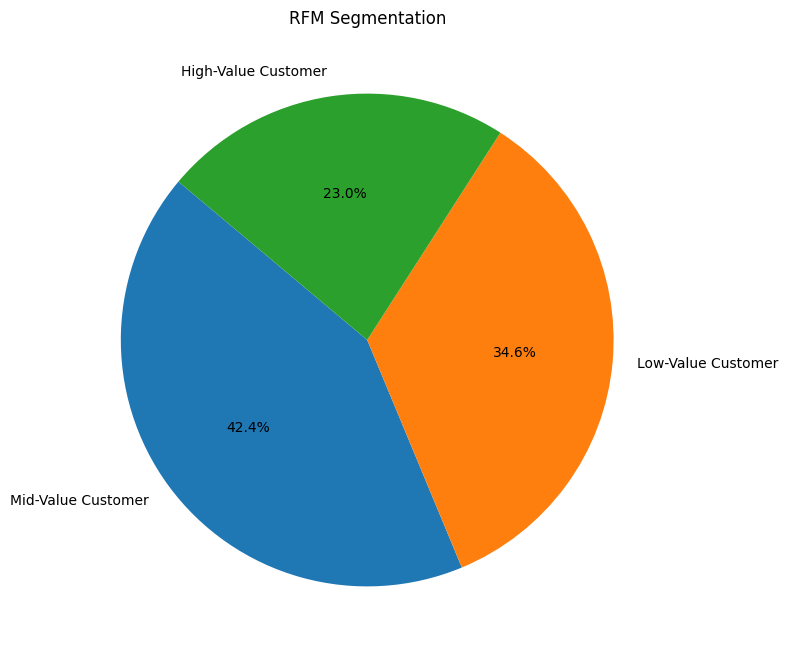

In [34]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Calculate the count of customers in each segment
segment_counts = rfm_df['RFM_Segment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('RFM Segmentation')
plt.show()


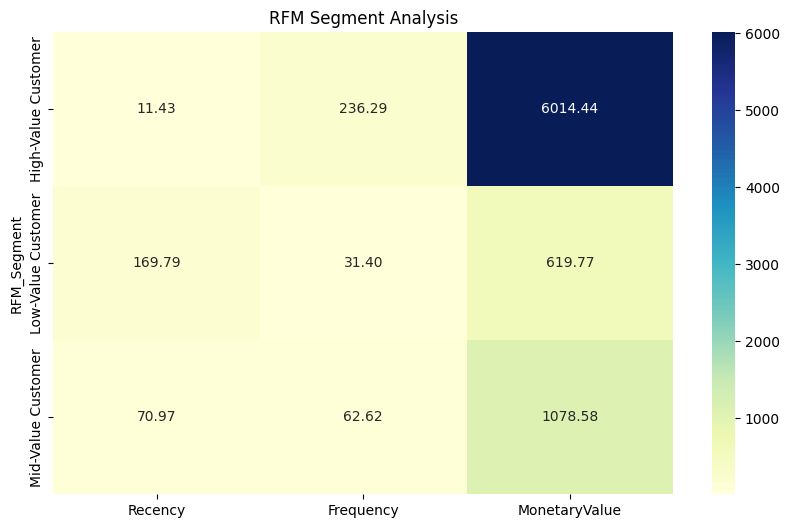

In [35]:
import seaborn as sns

# Calculate the average RFM values for each segment
rfm_segment_avg = rfm_df.groupby('RFM_Segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': 'mean'})

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rfm_segment_avg, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('RFM Segment Analysis')
plt.show()


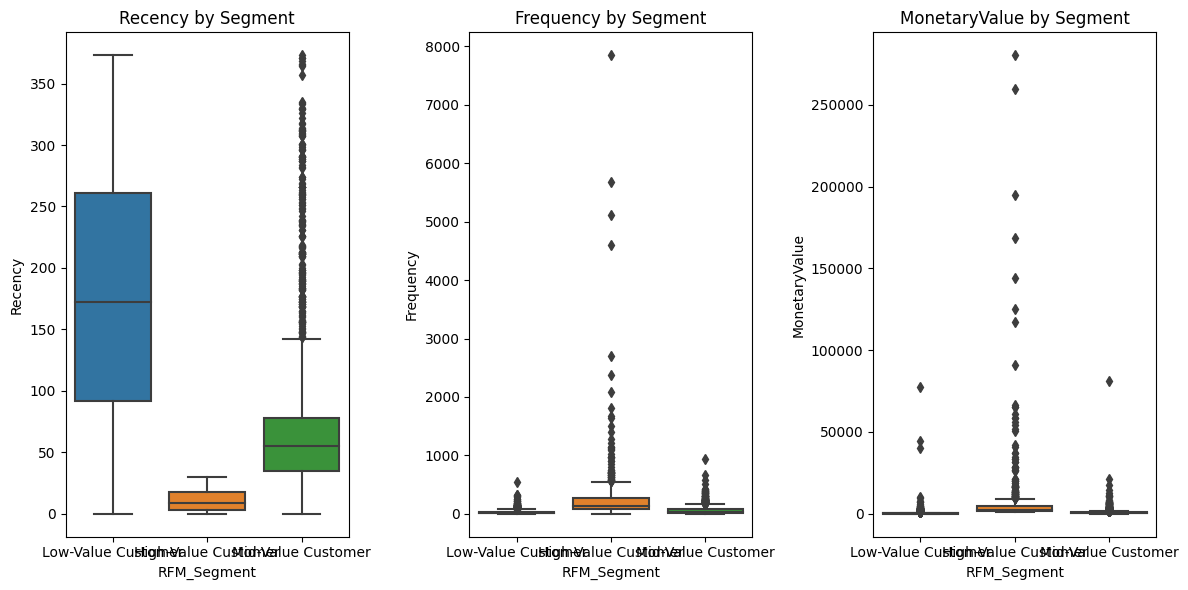

In [36]:
# Create box plots for Recency, Frequency, and MonetaryValue
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.boxplot(x='RFM_Segment', y='Recency', data=rfm_df)
plt.title('Recency by Segment')

plt.subplot(132)
sns.boxplot(x='RFM_Segment', y='Frequency', data=rfm_df)
plt.title('Frequency by Segment')

plt.subplot(133)
sns.boxplot(x='RFM_Segment', y='MonetaryValue', data=rfm_df)
plt.title('MonetaryValue by Segment')

plt.tight_layout()
plt.show()


### Data Clustering

In [44]:
# Standardize only the numeric RFM attributes
numeric_cols = ['Recency', 'Frequency', 'MonetaryValue']
scaler = StandardScaler()
rfm_df[numeric_cols] = scaler.fit_transform(rfm_df[numeric_cols])


In [45]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(rfm_scaled)
rfm_df['Cluster']=kmeans.labels_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Finding Optimal Number of Clusters using elbow method

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

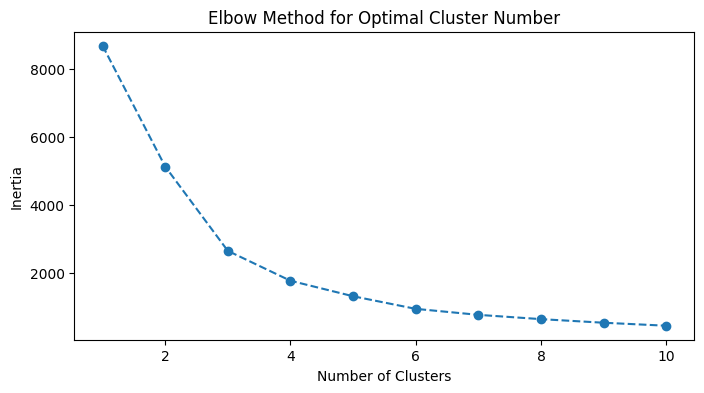

In [46]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=0).fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()
